Завдання 1
У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

DATASET 2D

In [254]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [255]:
current_dir = Path.cwd()

data2d= pd.read_csv(f"{current_dir}/data/data_2d.csv")

print("data_2d shape:", data2d.shape, "\n")
print("data_2d types:", "\n", data2d.dtypes, "\n")

print("data_2d nulls:", "\n", data2d.isnull().sum())

data2d.head(10)

data_2d shape: (199, 3) 

data_2d types: 
 0.000000000000000000e+00     float64
-7.687164597386728637e-01    float64
4.608603078297135447e-01     float64
dtype: object 

data_2d nulls: 
 0.000000000000000000e+00     0
-7.687164597386728637e-01    0
4.608603078297135447e-01     0
dtype: int64


,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
5,0.0,1.503020,1.074847
6,0.0,0.391662,-0.287497
7,0.0,0.321377,1.296743
8,0.0,0.591248,0.126716
9,0.0,1.150578,-0.266404


In [256]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [257]:
X = data2d.drop(columns=["0.000000000000000000e+00"])
X.columns=["feature_01","feature_02"]
X.head()

,feature_01,feature_02
0,2.687848,2.366961
1,-0.201379,0.470430
2,0.608496,1.225400
3,-0.082282,1.137218
4,2.083069,2.694482


In [258]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0:10]

array([[ 0.74680509,  0.09164376],
       [-1.60808161, -1.09343098],
       [-0.94798671, -0.62167696],
       [-1.51101032, -0.67677871],
       [ 0.2538759 ,  0.29630027],
       [-0.21889788, -0.71575204],
       [-1.12471868, -1.56703272],
       [-1.18200492, -0.57709727],
       [-0.96204436, -1.30820536],
       [-0.50615863, -1.55385225]])

In [259]:
sse = []
k_range = range(1,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    #inertia_ is a Sum of Squared Errors
    sse.append(kmeans.inertia_)
sse

[397.99999999999994,
 185.00977314193187,
 132.65299227569886,
 103.088739312836,
 90.1676767504276,
 70.54473924541097,
 58.48987241350589,
 55.343022192222676,
 48.73264602307651,
 43.72384583750405]

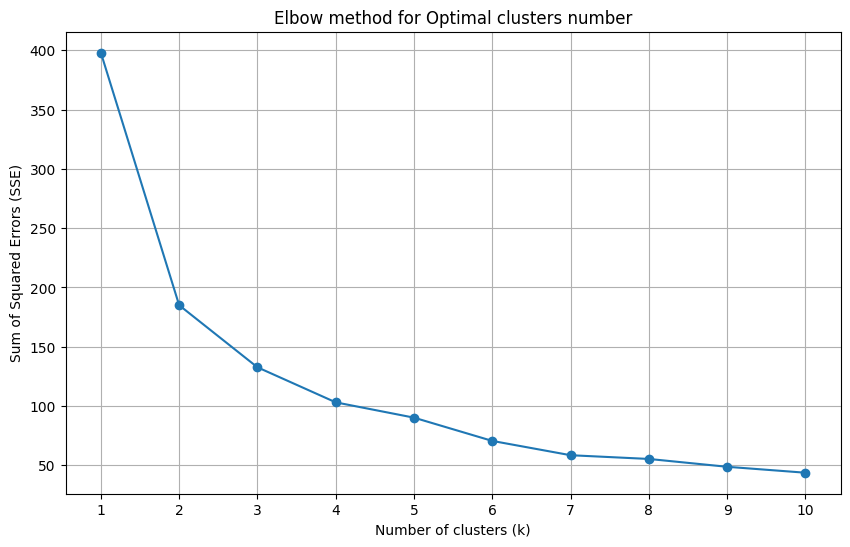

In [260]:
plt.figure(figsize=(10,6))
plt.plot(k_range, sse, marker ="o")

plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow method for Optimal clusters number")
plt.grid(True)
plt.xticks(k_range)
plt.show()

In [261]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X_scaled)

KMeans(n_clusters=4)

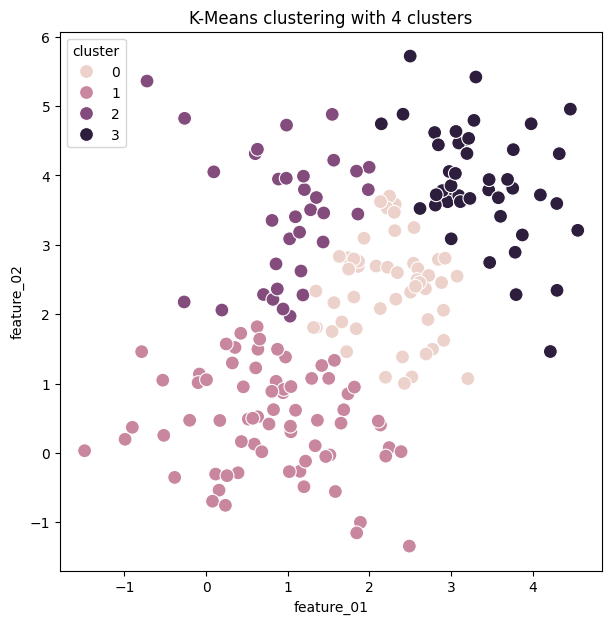

In [262]:
X["cluster"] = kmeans.labels_

plt.figure(figsize=(7,7))
sns.scatterplot(data=X, x="feature_01", y="feature_02", hue="cluster", s=100)
plt.title(f"K-Means clustering with {optimal_k} clusters")
plt.show()

DATASET MNIST

In [263]:
data_mnist = pd.read_csv(f"{current_dir}/data/mnist.csv")
data_mnist

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
print("data_mnist shape:", data_mnist.shape, "\n")
print("data_mnist types:", "\n", data_mnist.dtypes, "\n")

print("data_mnist nulls:", "\n", data_mnist.isnull().sum())

data_mnist shape: (499, 785) 

data_mnist types: 
 7        int64
0        int64
0.1      int64
0.2      int64
0.3      int64
         ...  
0.663    int64
0.664    int64
0.665    int64
0.666    int64
0.667    int64
Length: 785, dtype: object 

data_mnist nulls: 
 7        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.663    0
0.664    0
0.665    0
0.666    0
0.667    0
Length: 785, dtype: int64


In [265]:
X = data_mnist.drop(columns="7")

scaler_X = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
print("Length of X_scaled is ",len(X_scaled),"\n")
print("Length of one X_scaled element is",len(X_scaled[0]))

Length of X_scaled is  499 

Length of one X_scaled element is 784


In [266]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components=pca.fit_transform(X_scaled)

principal_components_df = pd.DataFrame(data=principal_components, columns=["Principal Component 1","Principal Component 2"])

In [267]:
sse_mnist = []
k_range = range(1,15)
for k in k_range:
    kmeans_mnist = KMeans(n_clusters=k)
    kmeans_mnist.fit(principal_components_df)
    sse_mnist.append(kmeans_mnist.inertia_)
#len(sse_mnist)

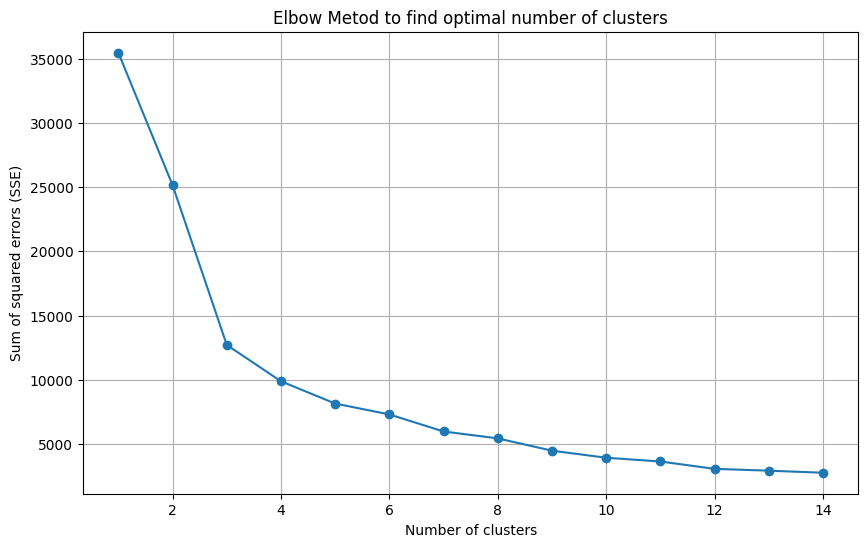

In [268]:
plt.figure(figsize=(10,6))
plt.plot(k_range, sse_mnist, marker="o")

plt.title("Elbow Metod to find optimal number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared errors (SSE)")
plt.grid(True)
plt.show()

In [269]:
k_mnist_optimal = 5
kmeans_mnist = KMeans(n_clusters = k_mnist_optimal)
kmeans_mnist.fit(principal_components_df)


KMeans(n_clusters=5)

In [270]:
#pasting back column with the real class
principal_components_df["real_class"] = data_mnist["7"]

#adding a new column with predicted class(label)
principal_components_df["k_means_label"] = kmeans_mnist.labels_

In [271]:
principal_components_df

,Principal Component 1,Principal Component 2,real_class,k_means_label
0,4.851556,-12.346968,2,1
1,-7.016781,-5.613877,1,4
2,8.542330,-0.406267,0,3
3,1.165449,6.612855,4,0
4,-7.669335,-5.343733,1,4
...,...,...,...,...
494,8.614164,-2.382453,8,3
495,-3.274236,7.274788,9,0
496,-6.226449,0.339855,4,4
497,0.356551,-0.366892,0,2


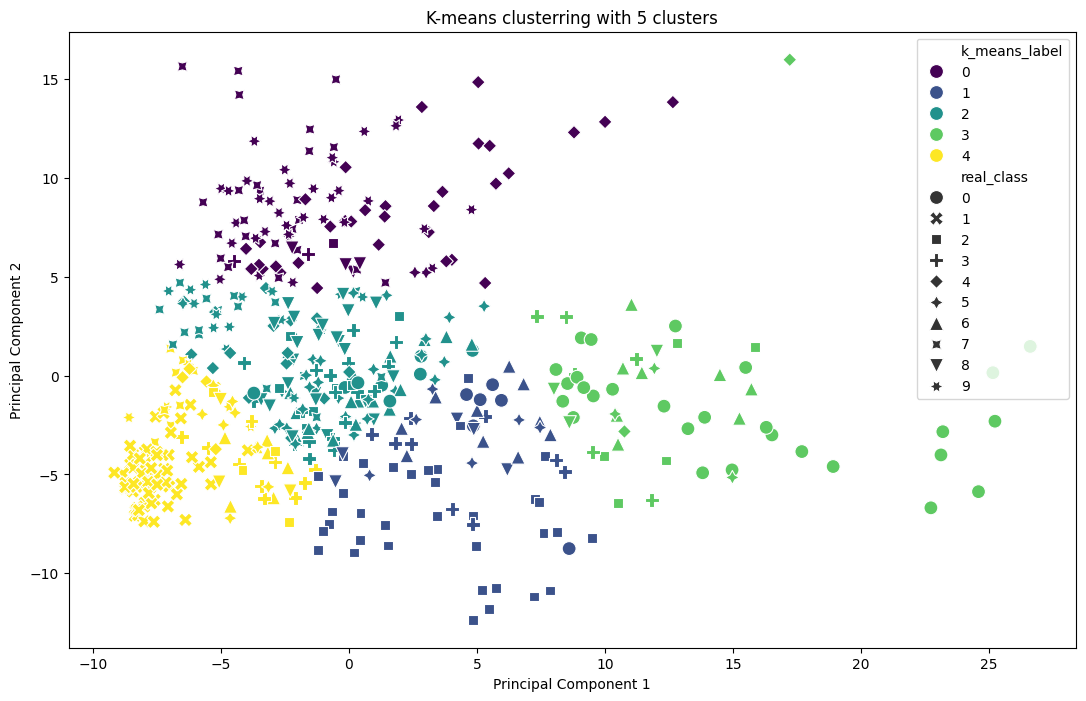

In [272]:
plt.figure(figsize=(13,8))
sns.scatterplot(data=principal_components_df, x="Principal Component 1", y="Principal Component 2", hue="k_means_label", style="real_class", palette="viridis", s=100)
plt.title(f"K-means clusterring with {k_mnist_optimal} clusters")

plt.show()

In [273]:
from sklearn.metrics import classification_report

In [274]:
df = principal_components_df[["real_class","k_means_label"]]

df.columns = ["true_label", "cluster"]

# Сопоставление кластера с наиболее частой истинной меткой
mapping = df.groupby("cluster")["true_label"].agg(lambda x: x.value_counts().index[0])

# Преобр кластеры в соответствии с истинными метками
predicted_classes_mapped = np.array([mapping[cluster] for cluster in kmeans_mnist.labels_])


In [275]:
from sklearn.metrics import classification_report

print(classification_report(df["true_label"], predicted_classes_mapped, zero_division=0))

              precision    recall  f1-score   support

           0       0.51      0.67      0.58        42
           1       0.58      1.00      0.73        67
           2       0.49      0.64      0.56        55
           3       0.00      0.00      0.00        45
           4       0.00      0.00      0.00        55
           5       0.20      0.62      0.30        50
           6       0.00      0.00      0.00        43
           7       0.00      0.00      0.00        48
           8       0.00      0.00      0.00        40
           9       0.35      0.65      0.45        54

    accuracy                           0.39       499
   macro avg       0.21      0.36      0.26       499
weighted avg       0.23      0.39      0.29       499

